In [7]:
import numpy as np
import os

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, MaskedLayer
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution1D
from keras.layers.noise import GaussianNoise

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
class GaussianNoisePermanent(GaussianNoise):
    ''' Extending the Keras GaussianNoise layer to work both 
        during train and test.
    '''

    def get_output(self, train=False):
        X = self.get_input(train)
        
        return X + K.random_normal(shape=K.shape(X),
                                   mean=0.,
                                   std=self.sigma)

# Data

In [11]:
train_filenames = ['../data/cd00' + '{:03d}'.format(i) + '.smp.npy' for i in range(1,101)]
X_train = np.vstack((np.load(fn)/1000 for fn in train_filenames if os.path.exists(fn)))
Y_train = X_train[:,7,:]

test_filenames = ['../data/cd00' + '{:03d}'.format(i) + '.smp.npy' for i in range(101,201)]
X_test = np.vstack((np.load(fn)/1000 for fn in test_filenames if os.path.exists(fn)))
Y_test = X_test[:,7,:]

# Model

In [ ]:
model = Sequential()

GaussianNoisePermanent(10, input_shape=(20,15))
model.add(Convolution1D(
        64,
        5, 
        input_dim=20, 
        init='glorot_normal', 
        input_length=15, 
        border_mode='same', 
        activation='relu'
))
# model.add(Dropout(0.5))

model.add(Convolution1D(
        64, 
        5, 
        init='glorot_normal', 
        border_mode='same', 
        activation='relu'
))

# model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(20, init='glorot_normal', activation='tanh'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(
    X_train, 
    Y_train, 
    nb_epoch=20, 
    batch_size=5, 
    validation_data=(X_test, Y_test),
    show_accuracy=True
)

score = model.predict(X_test, batch_size=16)

Train on 10137 samples, validate on 13371 samples
Epoch 1/20
10137/10137 [==============================] - 111s - loss: 0.0393 - acc: 0.4854 - val_loss: 0.0128 - val_acc: 0.6996
Epoch 2/20
10137/10137 [==============================] - 111s - loss: 0.0086 - acc: 0.7738 - val_loss: 0.0056 - val_acc: 0.8224
Epoch 3/20
10137/10137 [==============================] - 112s - loss: 0.0063 - acc: 0.8185 - val_loss: 0.0066 - val_acc: 0.8063
Epoch 4/20
10137/10137 [==============================] - 112s - loss: 0.0064 - acc: 0.8216 - val_loss: 0.0070 - val_acc: 0.7960
Epoch 5/20
10137/10137 [==============================] - 112s - loss: 0.0060 - acc: 0.8347 - val_loss: 0.0051 - val_acc: 0.8372
Epoch 6/20
10137/10137 [==============================] - 112s - loss: 0.0058 - acc: 0.8359 - val_loss: 0.0063 - val_acc: 0.8083
Epoch 7/20
10137/10137 [==============================] - 112s - loss: 0.0056 - acc: 0.8395 - val_loss: 0.0050 - val_acc: 0.8393
Epoch 8/20
10137/10137 [=======================

## PLAYGROUND

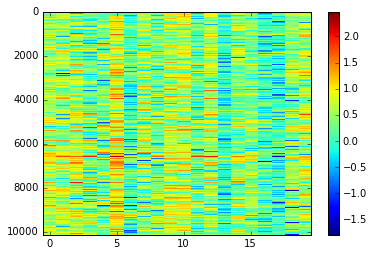

In [89]:
tmp = plt.imshow(model.predict(X_train) - Y_train, interpolation='nearest', aspect='auto')
plt.colorbar()

In [10]:
X_train

array([[[-0.364, -0.363, -0.569, ...,  0.178, -0.47 ,  0.   ],
        [-0.275, -0.393, -0.357, ...,  0.378, -0.512, -0.392],
        [-0.392, -0.422, -0.544, ..., -0.234,  0.324, -0.147],
        ..., 
        [-0.211, -0.501, -0.372, ..., -0.571, -0.501, -0.56 ],
        [-0.316, -0.545, -0.263, ..., -0.469, -0.441, -0.384],
        [-0.227, -0.284, -0.448, ...,  0.646, -0.44 , -0.317]],

       [[-0.275, -0.393, -0.357, ...,  0.378, -0.512, -0.392],
        [-0.392, -0.422, -0.544, ..., -0.234,  0.324, -0.147],
        [ 0.299,  0.397, -0.477, ...,  0.173, -0.453, -0.346],
        ..., 
        [-0.316, -0.545, -0.263, ..., -0.469, -0.441, -0.384],
        [-0.227, -0.284, -0.448, ...,  0.646, -0.44 , -0.317],
        [ 0.397,  0.339, -0.454, ...,  0.285, -0.502, -0.421]],

       [[-0.392, -0.422, -0.544, ..., -0.234,  0.324, -0.147],
        [ 0.299,  0.397, -0.477, ...,  0.173, -0.453, -0.346],
        [-0.383, -0.598, -0.404, ..., -0.502, -0.521, -0.413],
        ..., 
        [